# Linear Regression Example

### Comparison between sklearn's linear regression model performance versus mathematical implementation of linear regression using Gradient Descent method from scratch

### Dataset Information:

The dataset is- "Airfoil Self-Noise Data Set" taken from UCI Machine Learning Repository

Data Set Information:

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.

Attribute Information:

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.


URL for dataset-
https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise#


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

In [5]:
# Import CSV datafile-
airfoil_data = pd.read_csv("Airfoil_Self-Noise_Dataset.csv")

In [6]:
# Get shape/dimension of dataset-
print("\nDimension of dataset = {0}\n".format(airfoil_data.shape))


Dimension of dataset = (1502, 6)



In [7]:
# Get data type information for all attributes in dataset-
print("\nData types for different attributes in dataset are:\n{0}\n".format(airfoil_data.dtypes))


Data types for different attributes in dataset are:
Frequency_Hz                               int64
Angle_of_Attack_degrees                  float64
Chord_Length_meters                      float64
Free-stream_velocity_mps                 float64
Suction_side_displacement_thickness_m    float64
Sound_Pressure_Level_decibels            float64
dtype: object



In [8]:
# Check for missing values-
airfoil_data.isnull().values.any()

False

In [9]:
# Get attribute names in dataset-
print("\nAttribute names in dataset are:\n\n{0}\n".format(airfoil_data.columns.tolist()))


Attribute names in dataset are:

['Frequency_Hz', 'Angle_of_Attack_degrees', 'Chord_Length_meters', 'Free-stream_velocity_mps', 'Suction_side_displacement_thickness_m', 'Sound_Pressure_Level_decibels']



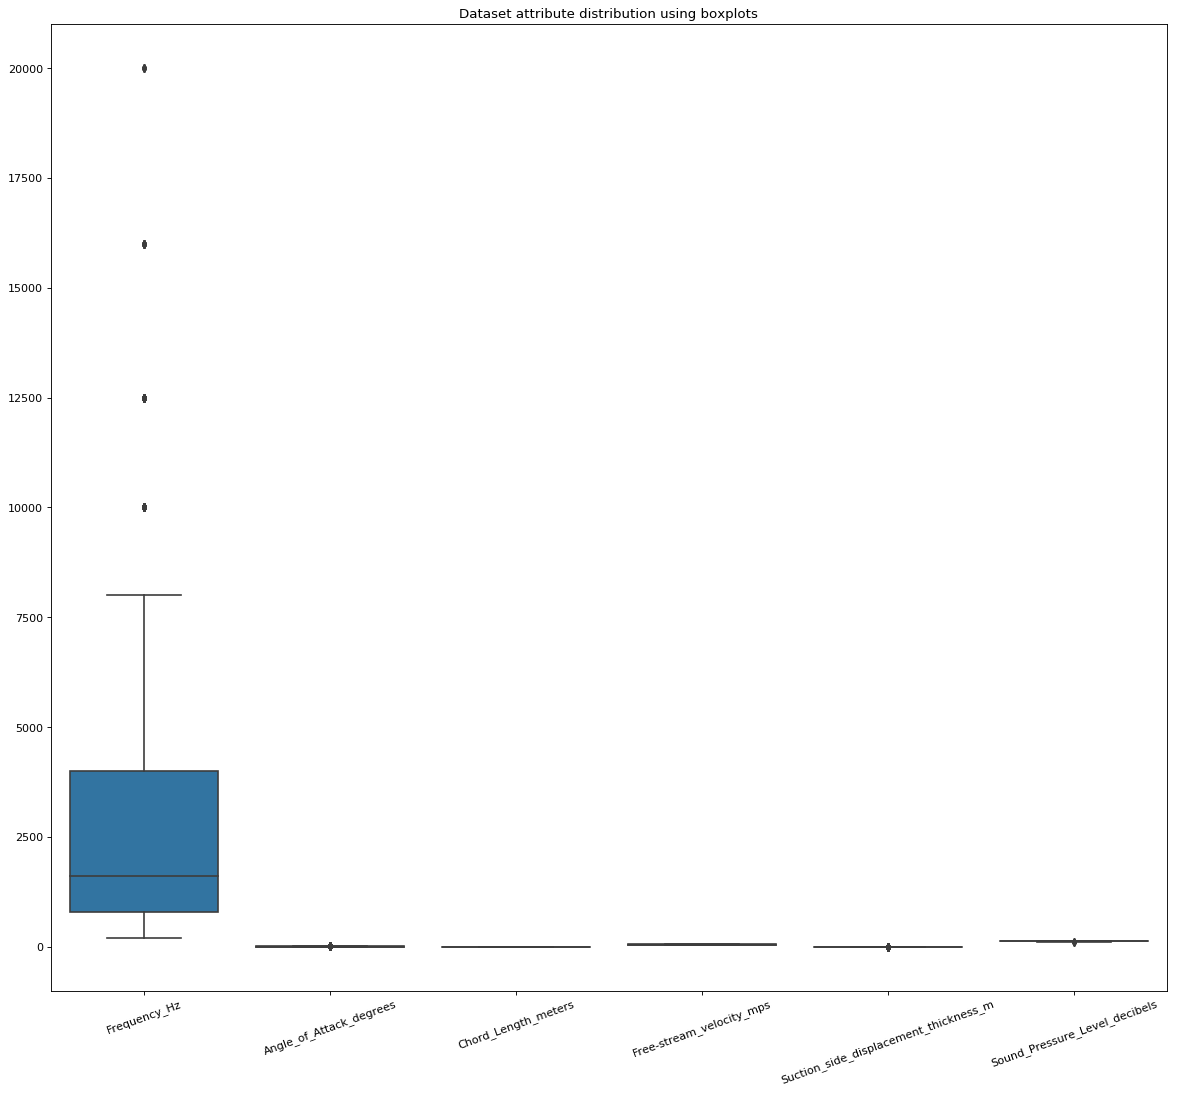

In [10]:
# Get data distribution of attributes in dataset using boxplots-
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

sns.boxplot(data = airfoil_data)

plt.xticks(rotation = 20)
plt.title("Dataset attribute distribution using boxplots")

plt.show()

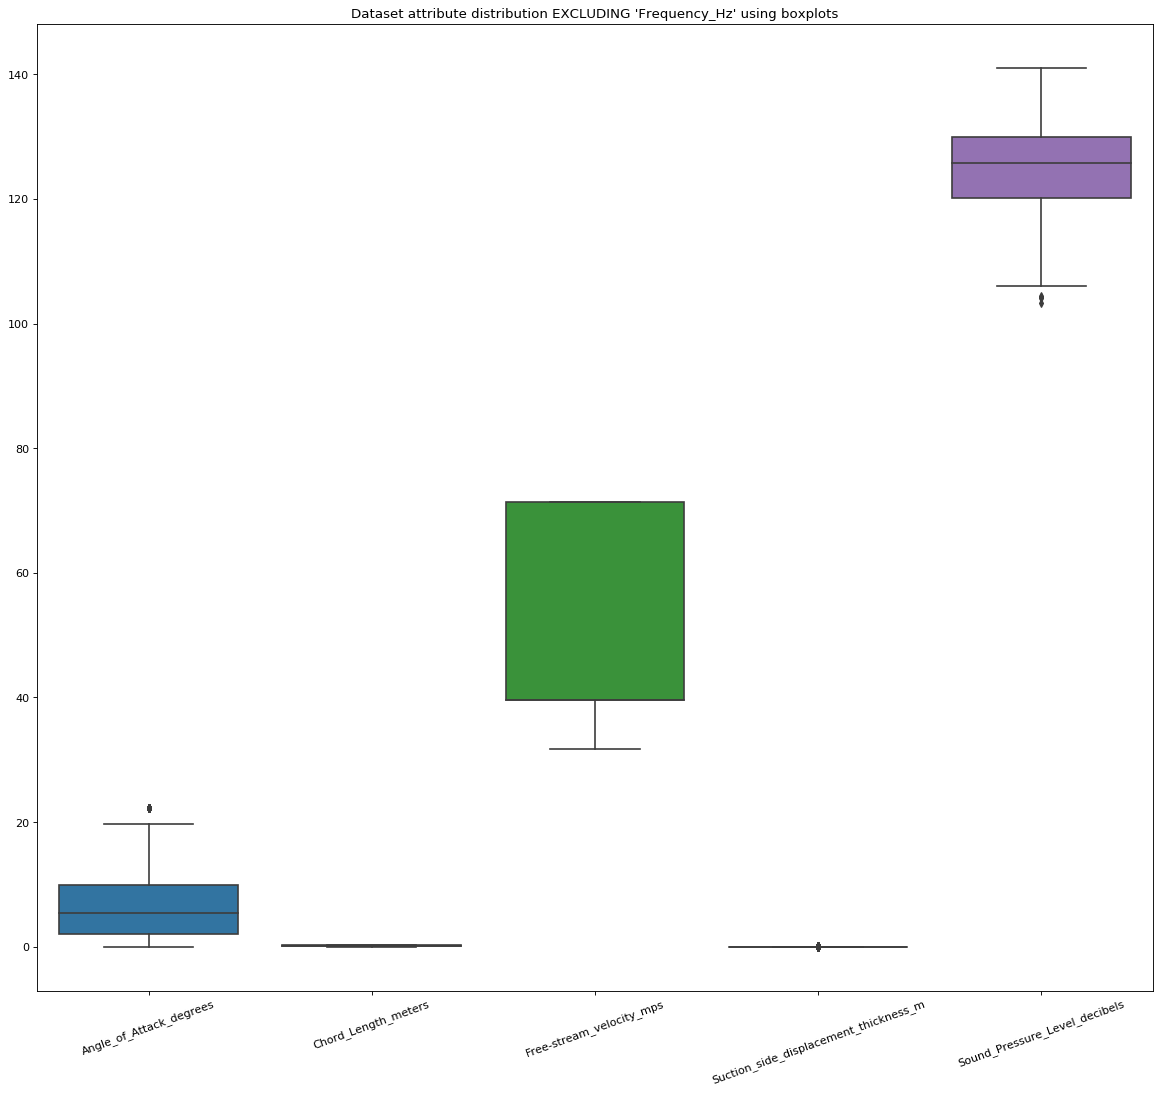

In [11]:
# Plot distribution of attributes EXCLUDING 'Frequency_Hz' attribute-
colnames = airfoil_data.columns.tolist()
colnames.remove('Frequency_Hz')

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

# Dataset distribution using boxplots-
sns.boxplot(data = airfoil_data.loc[:, colnames])

plt.xticks(rotation = 20)
plt.title("Dataset attribute distribution EXCLUDING 'Frequency_Hz' using boxplots")
plt.show()

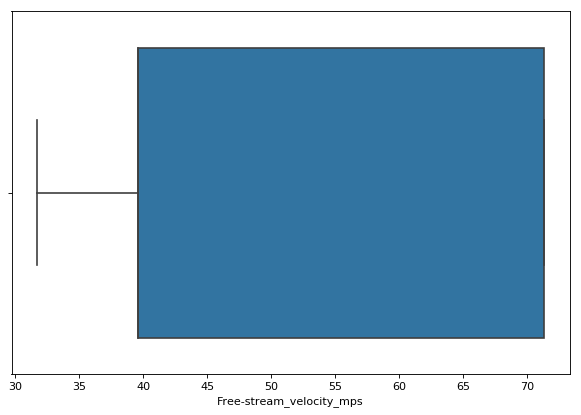

In [12]:
# To plot a boxplot for a particular attribute-
fig=plt.figure(figsize=(9, 6), dpi= 80, facecolor='w', edgecolor='k')

sns.boxplot(x=airfoil_data['Free-stream_velocity_mps'])

plt.show()


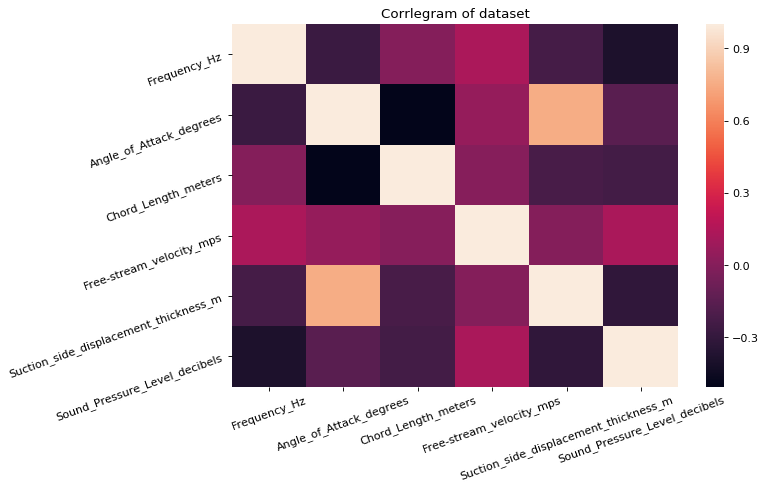

In [13]:
# Get correlogram of dataset-

# Compute correlation matrix of dataset-
airfoil_data_corr = airfoil_data.corr()

# Plot a heat map using correlation matrix of dataset-
fig=plt.figure(figsize=(9, 6), dpi= 80, facecolor='w', edgecolor='k')

sns.heatmap(data=airfoil_data_corr)

plt.xticks(rotation = 20)
plt.yticks(rotation = 20)
plt.title("Corrlegram of dataset")
plt.show()

<Figure size 1200x800 with 0 Axes>

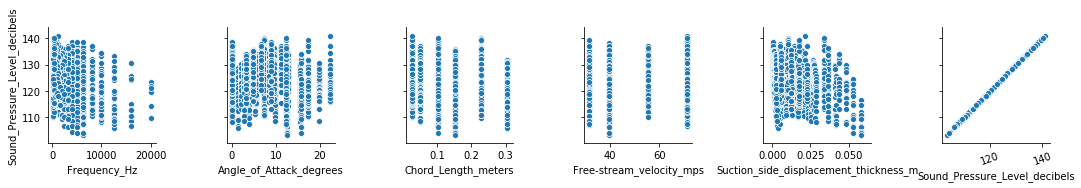

In [14]:
# Compare 1 independent vs many dependent variables using seaborn pairplot in horizontal plot-
fig=plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')

sns.pairplot(data = airfoil_data, y_vars='Sound_Pressure_Level_decibels', x_vars=airfoil_data.columns.tolist())

# plt.title("Independent vs Dependent attributes")
plt.xticks(rotation = 20)
plt.show()

In [15]:
# Separate features (X) and label (y)-
X = airfoil_data.drop('Sound_Pressure_Level_decibels', axis = 1)
y = airfoil_data['Sound_Pressure_Level_decibels']

In [16]:
# Apply normalisation or scaling to dataset-
rb_scaler = RobustScaler()

X_std = rb_scaler.fit_transform(X)

# Convert 'X_std' from numpy.ndarray to pandas DataFrame-
X_std = pd.DataFrame(X_std, columns=X.columns)

In [17]:
# Split features (X) and label (y) into training and testing sets-
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3)

print("\nTraining and testing set dimensions are:")
print("X_train = {0}, y_train = {1}, X_test = {2} and y_test = {3}\n\n".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))


Training and testing set dimensions are:
X_train = (1051, 5), y_train = (1051,), X_test = (451, 5) and y_test = (451,)




## Using sklearn Linear Regression model

In [18]:
# Initialize a Linear Regression model-
lr_model = LinearRegression()

In [19]:
# Train model using training data-
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
print("\nLinear Regression model scores:")
print("Training Data = {0:.4f} and Testing Data = {1:.4f}\n\n".format(lr_model.score(X_train, y_train), lr_model.score(X_test, y_test)))


Linear Regression model scores:
Training Data = 0.5491 and Testing Data = 0.4233




In [21]:
# Predict for unkown data using trained model-
y_pred = lr_model.predict(X_test)

In [22]:
# Get coefficients and intercept calculated by linear regression model-
linear_model_coefficients = pd.Series(lr_model.coef_, index = X_train.columns)

print("\nCoefficients for different attribute calculated by sklearn linear regression model are:\n\n{0}\n\n".format(linear_model_coefficients))


Coefficients for different attribute calculated by sklearn linear regression model are:

Frequency_Hz                            -4.083121
Angle_of_Attack_degrees                 -3.066504
Chord_Length_meters                     -6.710661
Free-stream_velocity_mps                 3.131815
Suction_side_displacement_thickness_m   -2.235955
dtype: float64




In [23]:
print("\nIntercept calculated by sklearn linear regression model is:\n{0:.4f}\n\n".format(lr_model.intercept_))


Intercept calculated by sklearn linear regression model is:
128.2893




## Using Mathematical model of Linear Regression using Gradient Descent

### The mathematical model for Linear Regression is as follows-

Linear Regression is now being implemented from scratch using Gradient Descent (optimisation) algorithm.

h(x) is the estimated function for a linear model consisting of 5 input attributes/variables and 1 output attribute according to our dataset

m is the total number of data points or instances in our training set

J is our cost function which in this case is the Mean Squared Error

x(i), y(i) is ith input example

θ represent different chosen parameter values or weights for the estimated function h(x)

In [24]:
from IPython.display import IFrame

In [25]:
IFrame("./Linear_Regression-1.pdf", width=600, height=300)

In [26]:
IFrame("./Linear_Regression-2.pdf", width=600, height=300)

In [27]:
# Print first 10 rows of normalized features (X)-
X_std.head(10)

,Frequency_Hz,Angle_of_Attack_degrees,Chord_Length_meters,Free-stream_velocity_mps,Suction_side_displacement_thickness_m
0,-0.187500,-0.683544,1.142857,1.0,-0.172421
1,-0.109375,-0.683544,1.142857,1.0,-0.172421
2,0.000000,-0.683544,1.142857,1.0,-0.172421
3,0.125000,-0.683544,1.142857,1.0,-0.172421
4,0.281250,-0.683544,1.142857,1.0,-0.172421
5,0.484375,-0.683544,1.142857,1.0,-0.172421
6,0.750000,-0.683544,1.142857,1.0,-0.172421
7,1.062500,-0.683544,1.142857,1.0,-0.172421
8,1.468750,-0.683544,1.142857,1.0,-0.172421
9,2.000000,-0.683544,1.142857,1.0,-0.172421


In [28]:
# Print last 10 rows of normalized features (X)-
X_std.tail(10)

,Frequency_Hz,Angle_of_Attack_degrees,Chord_Length_meters,Free-stream_velocity_mps,Suction_side_displacement_thickness_m
1492,-0.250000,1.291139,0.0,0.0,3.599539
1493,-0.187500,1.291139,0.0,0.0,3.599539
1494,-0.109375,1.291139,0.0,0.0,3.599539
1495,0.000000,1.291139,0.0,0.0,3.599539
1496,0.125000,1.291139,0.0,0.0,3.599539
1497,0.281250,1.291139,0.0,0.0,3.599539
1498,0.484375,1.291139,0.0,0.0,3.599539
1499,0.750000,1.291139,0.0,0.0,3.599539
1500,1.062500,1.291139,0.0,0.0,3.599539
1501,1.468750,1.291139,0.0,0.0,3.599539


In [29]:
# The normalized data give an indication for the initialization of the parameters/weights of θ-
# Using the range of [-5, 5] for initialization of θ-
theta0 = np.random.randint(-1, 4)
theta1 = np.random.randint(-1, 4)
theta2 = np.random.randint(-1, 4)
theta3 = np.random.randint(-1, 4)
theta4 = np.random.randint(-1, 4)
theta5 = np.random.randint(-1, 4)

# m is number of data points in training set
m = X_train.shape[0]
# print("\nm = {0}\n".format(m))

print("\nRandom initialization for thetas are:")
print("theta0 = {0:.4f}, theta1 = {1:.4f}, theta2 = {2:.4f}, theta3 = {3:.4f}, theta4 = {4:.4f}, theta5 = {5:.4f}".format(theta0, theta1, theta2, theta3, theta4, theta5))


Random initialization for thetas are:
theta0 = 0.0000, theta1 = 3.0000, theta2 = -1.0000, theta3 = 2.0000, theta4 = 0.0000, theta5 = 2.0000


In [30]:
# Learning alpha (alpha)-
alpha = 0.01

# Number of epochs to execute Gradient Descent-
epochs = 20000

In [31]:
# x1, x2, ..., x5 are different attributes of our features (X) and our target is (y) for TRAINING set-
x1 = X_train['Frequency_Hz'].values
x2 = X_train['Angle_of_Attack_degrees'].values
x3 = X_train['Chord_Length_meters'].values
x4 = X_train['Free-stream_velocity_mps'].values
x5 = X_train['Suction_side_displacement_thickness_m'].values

y_l = y_train.values

In [32]:
# Our estimated function-
# h_x = theta0 + (theta1 * x1) + (theta2 * x2) + (theta3 * x3) + (theta4 * x4) + (theta5 * x5)

# for each ith input example

In [33]:
X_train.head(5)

,Frequency_Hz,Angle_of_Attack_degrees,Chord_Length_meters,Free-stream_velocity_mps,Suction_side_displacement_thickness_m
1261,0.750000,-0.683544,0.000000,0.501577,-0.273403
196,2.625000,-0.683544,0.714286,1.000000,-0.211499
1243,0.000000,-0.683544,0.000000,1.000000,-0.281604
172,3.406250,-0.177215,1.142857,1.000000,0.001527
1487,-0.421875,1.291139,0.000000,0.000000,3.599539


In [34]:
# h_x is our predicted function for target 'y'-
h_x = 0

# delta is the difference between predicted value (h_x) and actual value (y_l) for TRAINING set-
delta0 = 0
delta1 = 0
delta2 = 0
delta3 = 0
delta4 = 0
delta5 = 0

# Counter to keep track of epochs-
k = 0

while k < epochs:
    
    # Initialize all deltas to 0 before traversal of all data points in training set-
    delta0 = delta1 = delta2 = delta3 = delta4 = delta5 = 0
    temp0 = temp1 = temp2 = temp3 = temp4 = temp5 = 0
    
    # Loop to traverse through all 'm' data points in training set-
    for i in range(m):
        h_x = theta0 + (theta1 * x1[i]) + (theta2 * x2[i]) + (theta3 * x3[i]) + (theta4 * x4[i]) + (theta5 * x5[i])
        
        delta0 += h_x - y_l[i]
        delta1 += (h_x - y_l[i]) * x1[i]
        delta2 += (h_x - y_l[i]) * x2[i]
        delta3 += (h_x - y_l[i]) * x3[i]
        delta4 += (h_x - y_l[i]) * x4[i]
        delta5 += (h_x - y_l[i]) * x5[i]

    # Derivative of cost function w.r.t each parameter/weight-
    delta0 = (delta0 * 2) / m
    delta1 = (delta1 * 2) / m
    delta2 = (delta2 * 2) / m
    delta3 = (delta3 * 2) / m
    delta4 = (delta4 * 2) / m
    delta5 = (delta5 * 2) / m
    
    # Simultaneous update of different thetas (parameters/weights)-
    temp0 = theta0 - (alpha * delta0)
    temp1 = theta1 - (alpha * delta1)
    temp2 = theta2 - (alpha * delta2)
    temp3 = theta3 - (alpha * delta3)
    temp4 = theta4 - (alpha * delta4)
    temp5 = theta5 - (alpha * delta5)
    
    theta0 = temp0
    theta1 = temp1
    theta2 = temp2
    theta3 = temp3
    theta4 = temp4
    theta5 = temp5

    '''
    # Update thetas-
    theta0 = theta0 - (alpha * delta0)
    theta1 = theta1 - (alpha * delta1)
    theta2 = theta2 - (alpha * delta2)
    theta3 = theta0 - (alpha * delta3)
    theta4 = theta4 - (alpha * delta4)
    theta5 = theta0 - (alpha * delta5)
    '''
    
    # Update counter variable-
    k = k + 1


print("\n\nGradient Descent for Linear Regression has executed successfully for {0} epochs.\n".format(epochs))



Gradient Descent for Linear Regression has executed successfully for 20000 epochs.



In [35]:
print("\nValues of weights/parameters obtained using Gradient Descent for Linear Regression are:\n")
print("Intercept = {0:4f}\n".format(theta0))
print("Coefficient for 'Frequency_Hz' = {0:4f}".format(theta1))
print("Coefficient for 'Angle_of_Attack_degrees' = {0:.4f}".format(theta2))
print("Coefficient for 'Chord_Length_meters' = {0:.4f}".format(theta3))
print("Coefficient for 'Free-stream_velocity_mps' = {0:.4f}".format(theta4))
print("Coefficient for 'Suction_side_displacement_thickness_m' = {0:.4f}".format(theta5))



Values of weights/parameters obtained using Gradient Descent for Linear Regression are:

Intercept = 128.289316

Coefficient for 'Frequency_Hz' = -4.083121
Coefficient for 'Angle_of_Attack_degrees' = -3.0665
Coefficient for 'Chord_Length_meters' = -6.7107
Coefficient for 'Free-stream_velocity_mps' = 3.1318
Coefficient for 'Suction_side_displacement_thickness_m' = -2.2360


In [36]:
# Make predictions using our calculated weights/parameters-

# Mean Squared Error (MSE)-
mse = 0

m = X_test.shape[0]
# print("\nNumber of instances in testing set are = {0}\n".format(m))

# x1, x2, ..., x5 are different attributes of our features (X) and our target is (y) for TESTING set-
x1 = X_test['Frequency_Hz'].values
x2 = X_test['Angle_of_Attack_degrees'].values
x3 = X_test['Chord_Length_meters'].values
x4 = X_test['Free-stream_velocity_mps'].values
x5 = X_test['Suction_side_displacement_thickness_m'].values

y_t = y_test.values

# Predictions made by Linear Regression model using Gradient Descent-
y_pred_lr_gd = []


for i in range(m):
    h_x = h_x = theta0 + (theta1 * x1[i]) + (theta2 * x2[i]) + (theta3 * x3[i]) + (theta4 * x4[i]) + (theta5 * x5[i])
    y_pred_lr_gd.append(h_x)
    mse += (h_x - y_t[i]) ** 2


mse = (1/m) * mse

print("\nMean Squared Error using Gradient Descent for Linear Regression = {0:.4f}\n".format(mse))
print("Mean Squared Error using sklearn Linear Regression = {0:.4f}\n\n".format(mean_squared_error(y_test, y_pred)))

print("Mean Absolute Error using Gradient Desent for Linear Regression = {0:.4f}\n".format(mean_absolute_error(y_test, y_pred_lr_gd)))
print("Mean Absolute Error using sklearn for Linear Regression = {0:.4f}\n\n".format(mean_absolute_error(y_test, y_pred)))

print("R-Squared Error using Gradient Desent for Linear Regression = {0:.4f}\n".format(r2_score(y_test, y_pred_lr_gd)))
print("R-Squared Error using sklearn Desent for Linear Regression = {0:.4f}\n".format(r2_score(y_test, y_pred_lr_gd)))


Mean Squared Error using Gradient Descent for Linear Regression = 25.6172

Mean Squared Error using sklearn Linear Regression = 25.6172


Mean Absolute Error using Gradient Desent for Linear Regression = 3.8207

Mean Absolute Error using sklearn for Linear Regression = 3.8207


R-Squared Error using Gradient Desent for Linear Regression = 0.4233

R-Squared Error using sklearn Desent for Linear Regression = 0.4233



## Observation:

We can see that the performance of Linear Regression using Gradient Descent is same to Linear Regression using sklearn library!

## Using Lasso Regression to see if the performance of prediction can be improved

In [37]:
# Initialize a base Lasso regression model-
lasso_model = Lasso()

In [38]:
# Train base lasso regression model on training data-
lasso_model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
# Make predictions using base lasso regression model-
y_pred_lasso = lasso_model.predict(X_test)

In [40]:
# Get model metrics-
print("\nLasso Regression base model metrics are as follows:")
print("Mean Absolute Error = {0:.4f}, Mean Square Error = {1:.4f}, R-Squared Score = {2:.4f}\n".format(mean_absolute_error(y_test, y_pred_lasso), mean_squared_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))


Lasso Regression base model metrics are as follows:
Mean Absolute Error = 4.5310, Mean Square Error = 31.7787, R-Squared Score = 0.2846



In [41]:
lasso_coefficients_base = pd.Series(lasso_model.coef_, index = X_train.columns.tolist())

print("\nFor base lasso regression model:\n")
print("Lasso Coefficients computed for different attributes sorted in a descending order are as follows:\n{0}\n\n".format(lasso_coefficients_base.sort_values(ascending = False)))


For base lasso regression model:

Lasso Coefficients computed for different attributes sorted in a descending order are as follows:
Free-stream_velocity_mps                 0.000000
Angle_of_Attack_degrees                 -0.000000
Chord_Length_meters                     -0.854826
Suction_side_displacement_thickness_m   -1.866107
Frequency_Hz                            -2.174433
dtype: float64




### Observation:
We can see that the performance of Lasso Regression model is worse than Linear Regression in this case

Also, attributes 'Free-stream_velocity_mps' and 'Angle_of_Attack_degrees' are eliminated using base Lasso Regression
model

### Using Hyperparameter optimization to see if better model performance can be obtained

In [42]:
# Initialize a lasso regression model using 10-fold Cross Validation-
lasso_search = LassoCV(alphas=[0.1, 0.01, 0.001, 0.0001, 0.00001, 1, 2, 5, 10, 15, 20, 25, 30, 40, 50], fit_intercept=True, cv=10)

In [43]:
# Train model on training data-
lasso_search.fit(X_train, y_train)

LassoCV(alphas=[0.1, 0.01, 0.001, 0.0001, 1e-05, 1, 2, 5, 10, 15, 20, 25, 30, 40, 50],
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [44]:
print("\nBest alpha found using Lasso Regression hyperparameter optimization = {0:.4f}\n".format(lasso_search.alpha_))


Best alpha found using Lasso Regression hyperparameter optimization = 0.0010



In [45]:
lasso_coefficients = pd.Series(lasso_search.coef_, index=X_train.columns.tolist())

print("\nFor hyperparameter optimized lasso regression model:\n")
print("\nLasso Coefficients computed for different attributes sorted in a descending order are as follows:\n{0}\n\n".format(lasso_coefficients.sort_values(ascending = False)))


For hyperparameter optimized lasso regression model:


Lasso Coefficients computed for different attributes sorted in a descending order are as follows:
Free-stream_velocity_mps                 3.126451
Suction_side_displacement_thickness_m   -2.237828
Angle_of_Attack_degrees                 -3.058770
Frequency_Hz                            -4.080638
Chord_Length_meters                     -6.702409
dtype: float64




## Using Ridge Regression to see if performance of regression can be improved

In [46]:
# Initialize a base ridge regression model-
rr_model = Ridge()

In [47]:
# Train base model on training data-
rr_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
# Make predictions using base trained model-
y_pred_rr = rr_model.predict(X_test)

In [49]:
# Get model metrics-
print("\nRidge Regression base model metrics are as follows:")
print("Mean Absolute Error = {0:.4f}, Mean Square Error = {1:.4f}, R-Squared Score = {2:.4f}\n".format(mean_absolute_error(y_test, y_pred_rr), mean_squared_error(y_test, y_pred_rr), r2_score(y_test, y_pred_rr)))


Ridge Regression base model metrics are as follows:
Mean Absolute Error = 3.8213, Mean Square Error = 25.6050, R-Squared Score = 0.4236



### Observation:
We can see that Ridge Regression base model has model metrics almost similar to Linear Regression ans is better than Lasso Regression, in this case/dataset.

### Performing Hyperparameter optimization for Ridge Regression

In [50]:
# Initialize a Ridge Regression object using 10-fold Cross Validation-
rr_search = RidgeCV(alphas=[0.1, 0.01, 0.001, 0.0001, 0.00001, 1, 2, 5, 10, 15, 20, 25, 30, 40, 50], fit_intercept=True, cv = 10)

In [51]:
# Trian model on training data-
rr_search.fit(X_train, y_train)

RidgeCV(alphas=array([1.0e-01, 1.0e-02, 1.0e-03, 1.0e-04, 1.0e-05, 1.0e+00, 2.0e+00,
       5.0e+00, 1.0e+01, 1.5e+01, 2.0e+01, 2.5e+01, 3.0e+01, 4.0e+01,
       5.0e+01]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [52]:
print("\nBest alpha parameter found using Hyperparameter optimiztion for Ridge Regression = {0:.4f}\n".format(rr_search.alpha_))


Best alpha parameter found using Hyperparameter optimiztion for Ridge Regression = 2.0000



In [53]:
# Initialize a 'best' Ridge Regression model using value of 'alpha' from above-
best_rr_model = Lasso(alpha=rr_search.alpha_)

# Train model on training data-
best_rr_model.fit(X_train, y_train)

# Make predictions using best model-
y_pred_rr_best = best_rr_model.predict(X_test)

In [54]:
# Get model metrics-
print("\nRidge Regression best model metrics are as follows:")
print("Mean Absolute Error = {0:.4f}, Mean Square Error = {1:.4f}, R-Squared Score = {2:.4f}\n".format(mean_absolute_error(y_test, y_pred_rr_best), mean_squared_error(y_test, y_pred_rr_best), r2_score(y_test, y_pred_rr_best)))


Ridge Regression best model metrics are as follows:
Mean Absolute Error = 5.1518, Mean Square Error = 39.3105, R-Squared Score = 0.1151



### Observation:
We can see that, Mean Absolute Error and Mean Squared Error have increased as compared to base model for Ridge Regression. Only R-Squared score has improved in this case.